In [2]:
!pip install soundfile


     ---------------------------------------- 1.0/1.0 MB 21.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
import numpy as np
from scipy.io import wavfile
from sklearn.decomposition import PCA

# Cargar la señal de audio estéreo
fs, audio = wavfile.read('prueba.wav')

# Convertir la señal a valores de punto flotante entre -1 y 1
audio = audio.astype(np.float32) / np.iinfo(audio.dtype).max

# Obtener los canales izquierdo y derecho
audio_left = audio[:, 0]
audio_right = audio[:, 1]

# Aplicar PCA a cada canal para reducir el ruido
pca_left = PCA(n_components=1)
audio_left_pca = pca_left.fit_transform(audio_left[:, np.newaxis])

pca_right = PCA(n_components=1)
audio_right_pca = pca_right.fit_transform(audio_right[:, np.newaxis])

# Reconstruir los canales originales
audio_left_reconstructed = pca_left.inverse_transform(audio_left_pca).flatten()
audio_right_reconstructed = pca_right.inverse_transform(audio_right_pca).flatten()

# Combinar los canales reconstruidos en una señal estéreo
audio_reconstructed = np.column_stack((audio_left_reconstructed, audio_right_reconstructed))

# Escalar la señal reconstruida al rango de -1 a 1
max_val = np.max(np.abs(audio_reconstructed))
audio_reconstructed /= max_val

# Convertir la señal reconstruida a enteros de 16 bits
audio_reconstructed = (audio_reconstructed * np.iinfo(np.int16).max).astype(np.int16)

# Guardar la señal de audio reconstruida
wavfile.write('audio_reconstructed.wav', fs, audio_reconstructed)


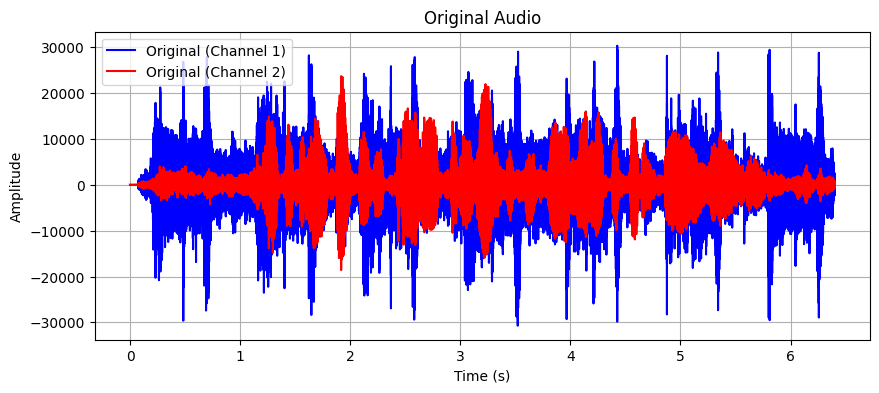

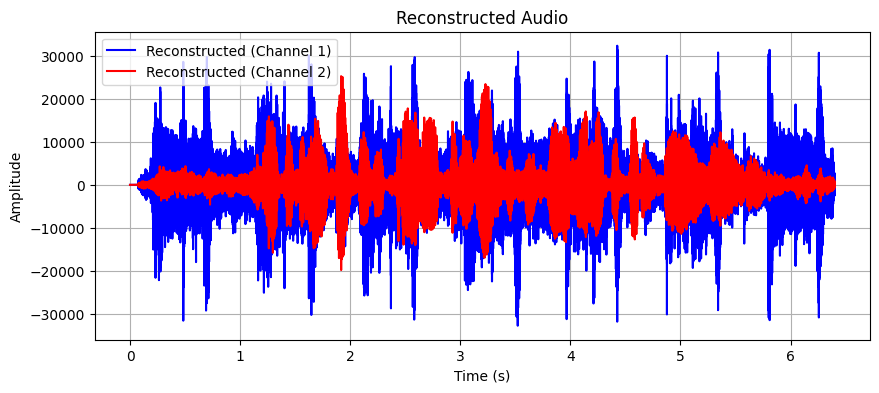

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Cargar la señal de audio original
fs, audio = wavfile.read('prueba.wav')

# Cargar la señal de audio reconstruida
fs_reconstructed, audio_reconstructed = wavfile.read('audio_reconstructed.wav')

# Crear el eje de tiempo para las señales
duration = len(audio) / fs  # Duración en segundos
time = np.linspace(0, duration, len(audio))

# Graficar la señal de audio original
plt.figure(figsize=(10, 4))
plt.plot(time, audio[:, 0], label='Original (Channel 1)', color='blue')
plt.plot(time, audio[:, 1], label='Original (Channel 2)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Audio')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la señal de audio reconstruida
plt.figure(figsize=(10, 4))
plt.plot(time, audio_reconstructed[:, 0], label='Reconstructed (Channel 1)', color='blue')
plt.plot(time, audio_reconstructed[:, 1], label='Reconstructed (Channel 2)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Audio')
plt.legend()
plt.grid(True)
plt.show()


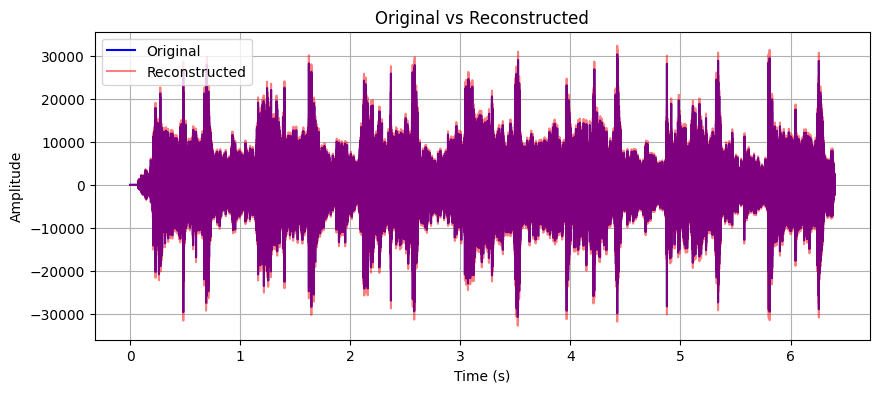

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Cargar la señal de audio original
fs, audio = wavfile.read('prueba.wav')

# Cargar la señal de audio reconstruida
fs_reconstructed, audio_reconstructed = wavfile.read('audio_reconstructed.wav')

# Obtener el canal izquierdo de ambas señales
audio_left = audio[:, 0]
audio_reconstructed_left = audio_reconstructed[:, 0]

# Crear el eje de tiempo para las señales
duration = len(audio_left) / fs  # Duración en segundos
time = np.linspace(0, duration, len(audio_left))

# Graficar la superposición de las formas de onda con transparencia
plt.figure(figsize=(10, 4))
plt.plot(time, audio_left, label='Original', color='blue')
plt.plot(time, audio_reconstructed_left, label='Reconstructed', color='red', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed')
plt.legend()
plt.grid(True)
plt.savefig('originalvsreconstructed.png', bbox_inches='tight', pad_inches=0)
plt.show()
